In [1]:
import ipywidgets as widgets
from IPython.display import Markdown
from IPython.display import display, clear_output
import mysql.connector
import sys
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Detalles de la conexión a la base de datos
config = {
    'user': 'root',
    'password': 'admin',
    'host': 'localhost',
    'database': 'bd_sist_int',
    'raise_on_warnings': True
}
# Crear la conexión a la base de datos
cnx = mysql.connector.connect(**config)

def mostrar_titulo(texto, tamano, color):
    titulo = f'<div style="text-align: center"><span style="font-size:{tamano}px; color:{color}">{texto}</span></div>'
    display(Markdown(titulo))

In [2]:
def mostrar_menu():
    # Limpia el contenido anterior
    # clear_output()
    # Muestra el menú de opciones
    display(contenedor_principal)

In [3]:
#AQUI INICIAN LOS "VOID" DE LOS BOTONES PRINCIPALES

def agregar(button):
    global num
    num=1
    print("AGREGAR")
    mostrar_botones_entidades()

def listar(button): 
    global num
    num=2
    print("LISTAR")
    mostrar_botones_entidades()

def editar(button):
    global num
    num=3
    print("EDITAR")
    mostrar_botones_entidades()

def eliminar(button):
    
    global num
    num =4
    print("ELIMINAR")
    mostrar_botones_entidades()
def graficar(button):
    global num
    num = 5
    print('GRAFICAR')
    mostrar_botones_entidades()
    

def salir(button):
    cursor.close()
    cnx.close()
    
    clear_output()
    raise KeyboardInterrupt


In [25]:
#AQUI INICIAN LOS "VOID" DE LOS BOTONES SECUNDARIOS    
    
def cliente(button):

    clear_output()
    
    if num==1:
        mostrar_menu_agregar_cliente()
    elif num==2:
        listar_clientes()
    elif num==3: #editar
        listar_clientes()
        mostrar_menu_editar_cliente()
    elif num==4: #eliminar
        listar_clientes()
        mostrar_menu_eliminar_cliente()
    elif num==5: #graficar
        mostrar_menu_graficar_cliente()
    
        
def empleado(button):
    
    clear_output()
    
    if num==1:
        mostrar_menu_agregar_empleado()
    elif num==2:
        listar_empleados()
    elif num==3:
        listar_empleados()
        mostrar_menu_editar_empleado()
    elif num==4: #eliminar
        listar_empleados()
        mostrar_menu_eliminar_empleado()
    elif num==5: #graficar
        mostrar_menu_graficar_empleado()

def producto(button):
    clear_output()
    # print("Opción: Agregar Producto")
    if num==1:
        mostrar_menu_agregar_productos()
    elif num==2:
        listar_productos()
    elif num==3:
        listar_productos()
        mostrar_menu_editar_producto()
    elif num==4: #eliminar
        listar_productos()
        mostrar_menu_eliminar_producto()
    elif num==5: #graficar
        mostrar_menu_graficar_producto()
        

In [5]:
# Llamada a la función para mostrar el título
mostrar_titulo("CRUD EMPLEADO", 32, "blue")

<div style="text-align: center"><span style="font-size:32px; color:blue">CRUD EMPLEADO</span></div>

In [6]:
# AQUI SE AGREGAN EMPLEADOS
def mostrar_menu_agregar_empleado():
    print('\tAGREGAR EMPLEADO:')
    mostrar_botones_entidades()
    
    # Crear los campos de entrada
    nombre = widgets.Text(description="Nombre:")
    edad = widgets.IntText(description="Edad:")
    salario = widgets.FloatText(description="Salario:")
    
    def limpiar_inputs(button):
        nombre.value = ""
        edad.value = 0
        salario.value = 0

    # Crear el botón de guardar
    boton_guardar = widgets.Button(description="Guardar empleado")
    btn_limpiar = widgets.Button(description= "Limpiar")

    # Asociar la funciónes de botones
    boton_guardar.on_click(lambda x: guardar_empleado(nombre.value, edad.value, salario.value))
    btn_limpiar.on_click(limpiar_inputs)
    

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor_agregar_empleado = widgets.VBox([nombre, edad, salario])
    contenedor_btn = widgets.HBox([boton_guardar,btn_limpiar])

    # Mostrar contenedores
    display(contenedor_agregar_empleado,contenedor_btn)
    
# AQUI SE GUARDAN LOS EMPLEADOS
def guardar_empleado(nombre, edad, salario):
    # Sentencia SQL para insertar un empleado
    query = "INSERT INTO Empleados (nombre, edad, salario) VALUES (%s, %s, %s)"
    values = (nombre, edad, salario)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        cursor.close()
        print("Empleado agregado exitosamente.")
        
    except mysql.connector.Error as err:
        print("Error al agregar el empleado:", err)
        

        
                                            # AQUI SE EDITAN LOS EMPLEADOS
            
def actualizar_editar_empleado(button):
    clear_output()
    listar_empleados()
    mostrar_menu_editar_empleado()
            
def mostrar_menu_editar_empleado():
    
    # Crear los campos de entrada
    id = widgets.IntText(description="ID:")
    nombre = widgets.Text(description="Nombre:")
    edad = widgets.IntText(description="Edad:")
    salario = widgets.FloatText(description="Salario:")
    
    def limpiar_inputs(button):
        nombre.value = ""
        edad.value = 0
        salario.value = 0
        id.value = 0
    
    
    # Crear los botones
    btn_editar = widgets.Button(description="Editar Empleado")
    btn_limpiar = widgets.Button(description="Limpiar")
    btn_actualizar = widgets.Button(description="Actualizar tabla")

    # Asociar la función guardar_producto al botón de guardar
    btn_editar.on_click(lambda x: editar_empleado(nombre.value, edad.value, salario.value, id.value))
    btn_limpiar.on_click(limpiar_inputs)
    btn_actualizar.on_click(actualizar_editar_empleado)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor_inputs = widgets.VBox([id, nombre, edad, salario])
    contenedor_btns = widgets.HBox([btn_editar, btn_limpiar])
    
    # Mostrar contenedores
    display(btn_actualizar)
    display(contenedor_inputs, contenedor_btns)        

    
def editar_empleado(nombre2, edad2, salario2, id):
    # Sentencia SQL para insertar un empleado
    query = "UPDATE empleados SET nombre = %s, edad = %s, salario = %s WHERE id = %s"
    values = (nombre2, edad2, salario2, id)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Empleado modificado exitosamente.")
    except mysql.connector.Error as err:
        print("Error al modificar al empleado:", err)
        
        
                                                # AQUI SE EDITAN LOS EMPLEADOS
                                                ##############################
            
def actualizar_eliminar_empleado(button):
    clear_output()
    listar_empleados()
    mostrar_menu_eliminar_empleado()
            
def mostrar_menu_eliminar_empleado():
    
    # Crear los campos de entrada
    id = widgets.IntText(description="ID:")
   

    
    # Crear los botones
    btn_eliminar = widgets.Button(description="Eliminar Empleado")
    btn_actualizar = widgets.Button(description="Actualizar tabla")

    # Asociar la función guardar_producto al botón de guardar
    btn_eliminar.on_click(lambda x: edliminar_empleado(id.value))
    btn_actualizar.on_click(actualizar_eliminar_empleado)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor = widgets.HBox([id, btn_eliminar])
    
    # Mostrar contenedores
    display(btn_actualizar)
    display(contenedor)        

    
def eliminar_empleado(id):
    # Sentencia SQL para eliminar un empleado
    query = "DELETE FROM empleados WHERE id = %s"
    values = ( id,)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Empleado con ID: "+str(id)+" eliminado exitosamente.")
    except mysql.connector.Error as err:
        print("Error al ELIMINAR al empleado:", err)

In [7]:
# Llamada a la función para mostrar el título
mostrar_titulo("CRUD PRODUCTOS", 32, "blue")

<div style="text-align: center"><span style="font-size:32px; color:blue">CRUD PRODUCTOS</span></div>

In [8]:
                                                    # AQUI SE AGREGAN PRODUCTOS
def mostrar_menu_agregar_productos():
    print('\tAGREGAR PRODUCTOS:')
    mostrar_botones_entidades()
    
    # Crear los campos de entrada
    nombre = widgets.Text(description="Nombre:")
    precio = widgets.FloatText(description="Precio:")
    stock = widgets.IntText(description="Stock:")
    
    def limpiar_inputs(button):
        nombre.value = ""
        precio.value = 0
        stock.value = 0

    # Crear el botón de guardar
    boton_guardar_productos = widgets.Button(description="Guardar Producto")
    boton_limpiar = widgets.Button(description="Limpiar")

    # Asociar la función guardar_producto al botón de guardar
    boton_guardar_productos.on_click(lambda x: guardar_producto(nombre.value, precio.value, stock.value))
    boton_limpiar.on_click(limpiar_inputs)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor_agregar_productos = widgets.VBox([nombre, precio, stock])
    contenedor_btn = widgets.HBox([boton_guardar_productos, boton_limpiar])

    # Mostrar contenedores
    display(contenedor_agregar_productos,contenedor_btn)
    
                                                        
def guardar_producto(nombre, precio, stock):
    # Sentencia SQL para insertar un empleado
    query = "INSERT INTO Productos (nombre, precio, stock) VALUES (%s, %s, %s)"
    values = (nombre, precio, stock)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Producto agregado exitosamente.")
    except mysql.connector.Error as err:
        print("Error al agregar el producto:", err)
        
                                
                                    # AQUI SE EDITAN LOS PRODUCTOS
                                    
def actualizar_editar_producto(button):
    clear_output()
    listar_productos()
    mostrar_menu_editar_producto()
            
def mostrar_menu_editar_producto():
    
    # Crear los campos de entrada
    id = widgets.IntText(description="ID:")
    nombre = widgets.Text(description="Nombre:")
    precio = widgets.FloatText(description="Precio:")
    stock = widgets.IntText(description="Stock:")
    
    def limpiar_inputs(button):
        nombre.value = ""
        precio.value = 0
        stock.value = 0
        id.value = 0
    
    
    # Crear los botones
    btn_editar = widgets.Button(description="Editar Producto")
    btn_limpiar = widgets.Button(description="Limpiar")
    btn_actualizar = widgets.Button(description="Actualizar tabla")

    # Asociar la función guardar_producto al botón de guardar
    btn_editar.on_click(lambda x: editar_producto(nombre.value, precio.value, stock.value, id.value))
    btn_limpiar.on_click(limpiar_inputs)
    btn_actualizar.on_click(actualizar_editar_producto)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor_inputs = widgets.VBox([id, nombre, precio, stock])
    contenedor_btn = widgets.HBox([btn_editar, btn_limpiar])
    
    # Mostrar contenedores
    display(btn_actualizar)
    display(contenedor_inputs, contenedor_btn)        

    
def editar_producto(nombre2, precio2, stock2, id):
    # Sentencia SQL para insertar un empleado
    query = "UPDATE productos SET nombre = %s, precio = %s, stock = %s WHERE id = %s"
    values = (nombre2, precio2, stock2, id)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Producto modificado exitosamente.")
    except mysql.connector.Error as err:
        print("Error al modificar al producto:", err)   
        
        
        
        
                                    # AQUI SE ELIMINAN LOS PRODUCTOS
                                    
def actualizar_eliminar_producto(button):
    clear_output()
    listar_productos()
    mostrar_menu_eliminar_producto()
            
def mostrar_menu_eliminar_producto():
    
    # Crear los campos de entrada
    id = widgets.IntText(description="ID:")
    

    # Crear los botones
    btn_eliminar = widgets.Button(description="Eliminar Producto")
    btn_actualizar = widgets.Button(description="Actualizar tabla")

    # Asociar la función guardar_producto al botón de guardar
    btn_eliminar.on_click(lambda x: eliminar_producto(id.value))
    btn_actualizar.on_click(actualizar_eliminar_producto)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor = widgets.HBox([id, btn_eliminar])
    
    # Mostrar contenedores
    display(btn_actualizar)
    display(contenedor)        

    
def eliminar_producto(id):
    # Sentencia SQL para insertar un empleado
    query = "DELETE FROM  productos WHERE id = %s"
    values = (id,)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Producto con ID: "+str(id)+" eliminado exitosamente.")
    except mysql.connector.Error as err:
        print("Error al ELIMINAR al producto:", err)
        
        

In [9]:
# Llamada a la función para mostrar el título
mostrar_titulo("CRUD CLIENTE", 32, "blue")


<div style="text-align: center"><span style="font-size:32px; color:blue">CRUD CLIENTE</span></div>

In [10]:
                                            # AQUI SE AGREGAN LOS CLIENTES

    
def mostrar_menu_agregar_cliente():
    mostrar_botones_entidades()
    
    # Crear los campos de entrada
    nombre = widgets.Text(description="Nombre:")
    direccion = widgets.Text(description="Direccion:")
    email = widgets.Text(description="Email:")
    
    def limpiar_inputs(button):
        nombre.value = ""
        direccion.value = ""
        email.value = ""
    
    # Crear los botones
    btn_guardar = widgets.Button(description="Guardar Cliente")
    btn_limpiar = widgets.Button(description="Limpiar")

    # Asociar la función guardar_producto al botón de guardar
    btn_guardar.on_click(lambda x: guardar_cliente(nombre.value, direccion.value, email.value))
    btn_limpiar.on_click(limpiar_inputs)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor_agregar_clientes = widgets.VBox([nombre, direccion, email])
    contenedor_btn = widgets.HBox([btn_guardar, btn_limpiar])
    
    # Mostrar contenedores
    display(contenedor_agregar_clientes, contenedor_btn)

    
    
                                                    # AQUI SE GUARDAN LOS CLIENTES
        
def guardar_cliente(nombre, direccion, email):
    # Sentencia SQL para insertar un empleado
    query = "INSERT INTO Clientes (nombre, direccion, email) VALUES (%s, %s, %s)"
    values = (nombre, direccion, email)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Cliente agregado exitosamente.")
        
    except mysql.connector.Error as err:
        print("Error al agregar al cliente:", err)

        
        
                                                    # AQUI SE EDITAN LOS CLIENTES
            
def actualizar_editar_cliente(button):
    clear_output()
    listar_clientes()
    mostrar_menu_editar_cliente()
            
def mostrar_menu_editar_cliente():
    #mostrar_botones_entidades()
    
    # Crear los campos de entrada
    id = widgets.IntText(description="ID:")
    nombre = widgets.Text(description="Nombre:")
    direccion = widgets.Text(description="Direccion:")
    email = widgets.Text(description="Email:")
    
    def limpiar_inputs(button):
        nombre.value = ""
        direccion.value = ""
        email.value = ""
        id.value = 0
    
    
    # Crear los botones
    btn_editar = widgets.Button(description="Editar Cliente")
    btn_limpiar = widgets.Button(description="Limpiar")
    btn_actualizar = widgets.Button(description="Actualizar tabla")

    # Asociar la función guardar_producto al botón de guardar
    btn_editar.on_click(lambda x: editar_cliente(nombre.value, direccion.value, email.value, id.value))
    btn_limpiar.on_click(limpiar_inputs)
    btn_actualizar.on_click(actualizar_editar_cliente)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor_agregar_clientes = widgets.VBox([id, nombre, direccion, email])
    contenedor_btn = widgets.HBox([btn_editar, btn_limpiar])
    
    # Mostrar contenedores
    display(btn_actualizar)
    display(contenedor_agregar_clientes, contenedor_btn)        

    
       
def editar_cliente(nombre2, direccion2, email2, id):
    # Sentencia SQL para insertar un empleado
    query = "UPDATE clientes SET nombre = %s, direccion = %s, email = %s WHERE id = %s"
    values = (nombre2, direccion2, email2, id)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Cliente modificado exitosamente.")
    except mysql.connector.Error as err:
        print("Error al modificar al cliente:", err)
        
        
                                            # AQUI SE ELIMINAN LOS CLIENTES
            
def actualizar_eliminar_cliente(button):
    clear_output()
    listar_clientes()
    mostrar_menu_eliminar_cliente()
            
def mostrar_menu_eliminar_cliente():
    #mostrar_botones_entidades()
    
    # Crear los campos de entrada
    id = widgets.IntText(description="ID:")
    
    
    # Crear los botones
    btn_eliminar = widgets.Button(description="Eliminar Cliente")
    btn_actualizar = widgets.Button(description="Actualizar tabla")

    # Asociar las funciones de los botones
    btn_eliminar.on_click(lambda x: eliminar_cliente(id.value))
    btn_actualizar.on_click(actualizar_eliminar_cliente)

    # Crear el contenedor para los campos de entrada y el botón de guardar
    contenedor = widgets.HBox([id, btn_eliminar])
    
    # Mostrar contenedores
    display(btn_actualizar)
    display(contenedor)        

    
       
def eliminar_cliente(id):
    # Sentencia SQL para eliminar un empleado
    query = "DELETE FROM clientes WHERE id = %s"
    values = (id,)

    try:
        # Ejecutar la sentencia SQL
        cursor = cnx.cursor()
        cursor.execute(query, values)

        # Confirmar los cambios en la base de datos
        cnx.commit()
        
        cursor.close()
        print("Cliente con ID: "+str(id)+" eliminado exitosamente.")
    except mysql.connector.Error as err:
        print("Error al eliminar al cliente:", err)
    
    
        

In [11]:
mostrar_titulo("LISTAR TABLAS", 32, "blue")

<div style="text-align: center"><span style="font-size:32px; color:blue">LISTAR TABLAS</span></div>

In [12]:

def listar_empleados():
    mostrar_botones_entidades()
    print('TABLA EMPLEADOS')
    
    # Ejecutar una consulta SQL
    query = "SELECT * FROM empleados"
    cursor = cnx.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    column_names = cursor.column_names
    df = pd.DataFrame(data, columns=column_names)
    df.columns = df.columns.str.upper()

    tabla = tabulate(df,headers='keys', tablefmt='fancy_grid')
    cursor.close()
    
    print(tabla)
    

      
def listar_clientes():
    mostrar_botones_entidades()
    print('TABLA CLIENTES')
    
    # Ejecutar una consulta SQL
    query = "SELECT * FROM clientes"
    cursor = cnx.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    column_names = cursor.column_names
    df = pd.DataFrame(data, columns=column_names)
    df.columns = df.columns.str.upper()

    tabla = tabulate(df,headers='keys', tablefmt='fancy_grid')
    cursor.close()
    
    print(tabla)
    
def listar_productos():
    mostrar_botones_entidades()
    print('TABLA PRODUCTOS')
    
    # Ejecutar una consulta SQL
    query = "SELECT * FROM productos"
    cursor = cnx.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    column_names = cursor.column_names
    df = pd.DataFrame(data, columns=column_names)
    df.columns = df.columns.str.upper()

    tabla = tabulate(df,headers='keys', tablefmt='fancy_grid')
    cursor.close()
    
    print(tabla)
    
def atras(button):
    clear_output()
    display(contenedor_principal)

In [13]:
#AQUI SE CREAN LOS BOTONES CLIENTE, EMPLEADO Y PRODUCTO

def mostrar_botones_entidades():
    clear_output()
    if(num==1):
        mostrar_titulo("OPCION AGREGAR", 30, "red")
    elif(num==2):
        mostrar_titulo("OPCION LISTAR", 30, "blue")
    elif(num==3):
        mostrar_titulo("OPCION EDITAR", 30, "blue")
    elif(num==4):
        mostrar_titulo("OPCION ELIMINAR", 30, "blue")
    elif(num==5):
        mostrar_titulo("OPCION GRAFICAR", 30, "blue")
    
        
    # Crea los botones de entidades
    boton_cliente = widgets.Button(description="Cliente", button_style='success')
    boton_empleado = widgets.Button(description="Empleado", button_style='info')
    boton_producto = widgets.Button(description="Producto", button_style='danger')
    boton_atras = widgets.Button(description="Atras" )

    # Asocia las funciones a los botones de entidades
    boton_cliente.on_click(cliente)
    boton_empleado.on_click(empleado)
    boton_producto.on_click(producto)
    boton_atras.on_click(atras)

    # Crea el contenedor para los botones de entidades
    contenedor_entidades = widgets.HBox([boton_cliente, boton_empleado, boton_producto, boton_atras])

    titulo = widgets.HTML("<h2 style='color: #337ab7; text-align: center;'>Escoja la tabla</h2>")
    # Actualiza el contenido del contenedor de botones
    #contenedor_botones.children = [contenedor_entidades]
    display(contenedor_entidades)

In [14]:
mostrar_titulo('GRAFICAR TABLAS', 30, 'blue')

<div style="text-align: center"><span style="font-size:30px; color:blue">GRAFICAR TABLAS</span></div>

In [17]:
def mostrar_menu_graficar_cliente():
    print('MOSTRAR GRAFICOS')
    
    # Crear un cursor
    cursor = cnx.cursor()

    # Ejecutar una consulta para obtener los datos de la tabla
    query = "SELECT nombre, direccion FROM CLIENTES"
    cursor.execute(query)

    # Obtener los resultados de la consulta
    results = cursor.fetchall()

    # Extraer las columnas de los resultados
    columna1 = [row[0] for row in results]
    columna2 = [row[1] for row in results]

    # Graficar los datos
    plt.bar(columna1, columna2)
    plt.xlabel("Columna 1")
    plt.ylabel("Columna 2")
    plt.title("Tabla de la base de datos")

    # Mostrar el gráfico
    plt.show()

    # Cerrar el cursor y la conexión
    cursor.close()
    

In [32]:
def mostrar_menu_graficar_producto():
    print('MOSTRAR GRAFICOS')
    mostrar_botones_entidades()
    
    # Crear un cursor
    cursor = cnx.cursor()

    # Ejecutar una consulta para obtener los datos de la tabla
    query = "SELECT precio, stock FROM PRODUCTOS"
    cursor.execute(query)

    # Obtener los resultados de la consulta
    results = cursor.fetchall()

    # Extraer las columnas de los resultados
    columna1 = [row[0] for row in results]
    columna2 = [row[1] for row in results]

    # Graficar los datos
    plt.bar(columna1, columna2)
    plt.xlabel("Precio")
    plt.ylabel("Stock")
    plt.title("Tabla Productos")

    # Mostrar el gráfico
    plt.show()

    # Cerrar el cursor y la conexión
    cursor.close()

In [23]:
def mostrar_menu_graficar_empleado():
    print('MOSTRAR GRAFICOS')
    mostrar_botones_entidades()
    
    # Crear un cursor
    cursor = cnx.cursor()

    # Ejecutar una consulta para obtener los datos de la tabla
    query = "SELECT edad, salario FROM EMPLEADOS"
    cursor.execute(query)

    # Obtener los resultados de la consulta
    results = cursor.fetchall()

    # Extraer las columnas de los resultados
    columna1 = [row[0] for row in results]
    columna2 = [row[1] for row in results]

    # Graficar los datos
    plt.bar(columna1, columna2)
    plt.xlabel("EDAD")
    plt.ylabel("SALARIO")
    plt.title("Tabla Empleados")

    # Mostrar el gráfico
    plt.show()

    # Cerrar el cursor y la conexión
    cursor.close()

In [27]:
mostrar_titulo('MENU PRINCIPAL',30,'blue')

<div style="text-align: center"><span style="font-size:30px; color:blue">MENU PRINCIPAL</span></div>

<div style="text-align: center"><span style="font-size:30px; color:blue">OPCION GRAFICAR</span></div>

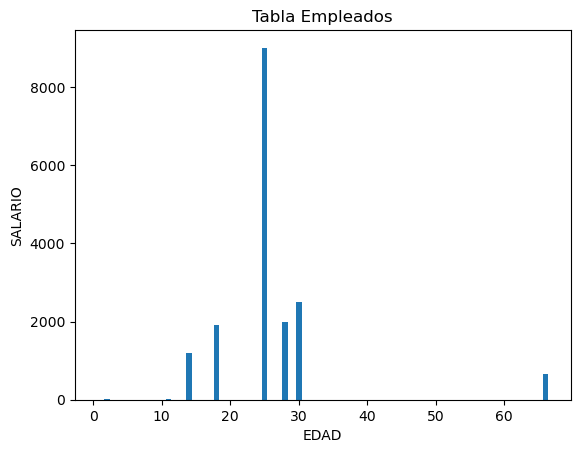

In [33]:
#TODO ESTO ES LO QUE APARECE POR PRIMERA VEZ
    
# Crea los botones con estilo personalizado
boton_agregar = widgets.Button(description="Agregar", button_style='success')
boton_listar = widgets.Button(description="Listar", button_style='info')
boton_editar = widgets.Button(description="Editar", button_style='warning')
boton_eliminar = widgets.Button(description="Eliminar", button_style='danger')
boton_graficar = widgets.Button(description="Graficar", button_style='info')

boton_salir = widgets.Button(description="Salir")

# Asocia las funciones a los botones  
boton_agregar.on_click(agregar)
boton_listar.on_click(listar)
boton_editar.on_click(editar)
boton_eliminar.on_click(eliminar)
boton_graficar.on_click(graficar)
boton_salir.on_click(salir)

# Crea el contenedor para los botones
contenedor_botones = widgets.HBox([boton_agregar, boton_listar, boton_editar, boton_eliminar, boton_graficar,boton_salir])

# Crea el título del menú con estilo personalizado
titulo = widgets.HTML("<h2 style='color: #337ab7; text-align: center;'>MENU PRINCIPAL</h2>")

# Crea el contenedor principal
contenedor_principal = widgets.VBox([titulo, contenedor_botones])

# Muestra el menú de opciones inicial

#mostrar_menu()
display(contenedor_principal)
